### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

# Step 1: Load the Dataset
url = "C:\\Users\\manoj\\OneDrive\\Desktop\\Data Science Files\\Assignment-Time Series (1)\\Assignment-Time Series\\footfalls.csv"
footfall_data = pd.read_csv(url)


print(footfall_data.head(10))
print(footfall_data.info(10))
print(footfall_data.describe())


    Month  Footfalls   t  log_footfalls  t_square  Jan  Feb  Mar  Apr  May  \
0  Jan-91       1709   1       7.443664         1    1    0    0    0    0   
1  Feb-91       1621   2       7.390799         4    0    1    0    0    0   
2  Mar-91       1973   3       7.587311         9    0    0    1    0    0   
3  Apr-91       1812   4       7.502186        16    0    0    0    1    0   
4  May-91       1975   5       7.588324        25    0    0    0    0    1   
5  Jun-91       1862   6       7.529406        36    0    0    0    0    0   
6  Jul-91       1940   7       7.570443        49    0    0    0    0    0   
7  Aug-91       2013   8       7.607381        64    0    0    0    0    0   
8  Sep-91       1596   9       7.375256        81    0    0    0    0    0   
9  Oct-91       1725  10       7.452982       100    0    0    0    0    0   

   Jun  Jul  Aug  Sep  Oct  Nov  Dec  
0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0   

In [2]:
# Step 2: Preprocess the Data
footfall_data['Month'] = pd.to_datetime(footfall_data['Month'], format='%b-%y')
footfall_data.set_index('Month', inplace=True)


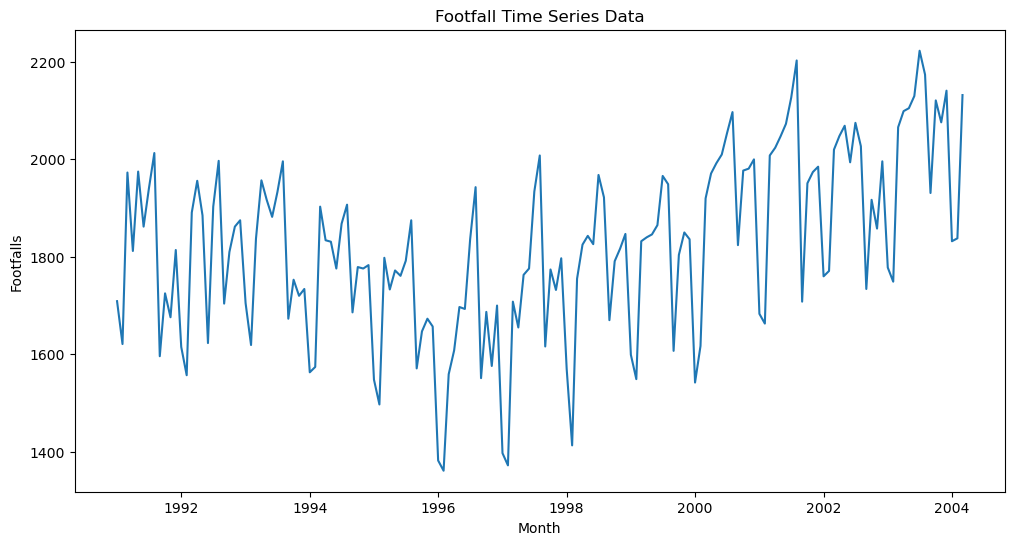

In [3]:
# Step 3: Visualize the Data
plt.figure(figsize=(12, 6))
plt.plot(footfall_data.index, footfall_data['Footfalls'])
plt.title('Footfall Time Series Data')
plt.xlabel('Month')
plt.ylabel('Footfalls')
plt.show()

In [8]:
# Step 3: Differencing
footfall_data['Diff_Footfalls'] = footfall_data['Footfalls'].diff()
footfall_data.dropna(inplace=True)

In [9]:
# Step 4: Check for Stationarity Again
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

check_stationarity(footfall_data['Diff_Footfalls'])

Test Statistic                  -3.157121
p-value                          0.022605
#Lags Used                      13.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


In [10]:
# Step 5: Split Data
train_size = int(len(footfall_data) * 0.7)
train_data, test_data = footfall_data.iloc[:train_size], footfall_data.iloc[train_size:]

In [23]:
# Step 6: Model Selection (ARIMA)
model = auto_arima(train_data['Diff_Footfalls'], seasonal=False, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1397.546, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1429.748, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1424.191, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1406.714, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1398.671, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1398.902, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1399.476, Time=0.11 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1397.851, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1407.782, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1367.226, Time=0.26 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0

In [24]:
# Step 7: Train the Model
model.fit(train_data['Diff_Footfalls'])

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [25]:
# Step 8: Validate the Model
predictions = model.predict(len(test_data))
mse = mean_squared_error(test_data['Diff_Footfalls'], predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 17286.787036718848


In [26]:
# Step 9: Forecast Future Values
future_forecast = model.predict(n_periods=10)


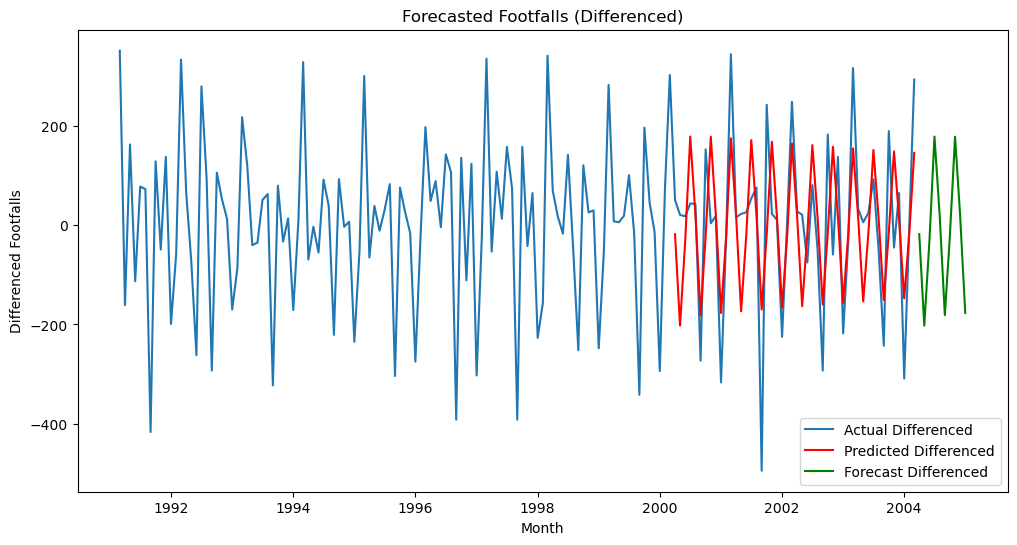

In [27]:
# Step 10: Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(footfall_data.index, footfall_data['Diff_Footfalls'], label='Actual Differenced')
plt.plot(test_data.index, predictions, label='Predicted Differenced', color='red')
plt.plot(pd.date_range(test_data.index[-1], periods=10, freq='M'), future_forecast, label='Forecast Differenced', color='green')
plt.title('Forecasted Footfalls (Differenced)')
plt.xlabel('Month')
plt.ylabel('Differenced Footfalls')
plt.legend()
plt.show()